1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Digit: 4


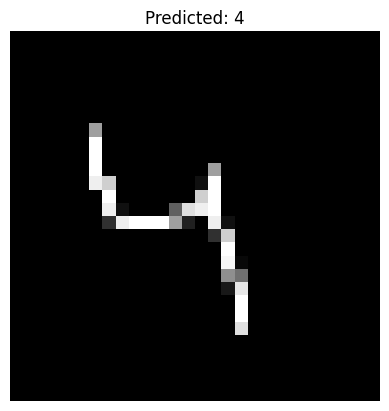

In [7]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load your saved model
model = load_model("mnist_model.h5")

# Preprocessing function
def preprocess_image(img_path):
    img = Image.open(img_path).convert('L')         # Grayscale
    img = ImageOps.invert(img)                      # Invert colors
    img = img.resize((28, 28))                      # Resize to 28x28
    img_array = np.array(img) / 255.0               # Normalize to [0, 1]
    img_array = img_array.reshape(1, 784)           # Reshape for model input
    return img_array

# Load and preprocess image
img_path = "test/image2/digit.png"  # your saved image
x_input = preprocess_image(img_path)

# Predict
pred = model.predict(x_input)
digit = np.argmax(pred)
print(f"Predicted Digit: {digit}")

# Show image
plt.imshow(x_input.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {digit}")
plt.axis('off')
plt.show()
